#advance method column






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/case2

/content/drive/MyDrive/case2


In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from numpy import percentile
from scipy.stats import spearmanr
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Importing and Analyzing the data

In [ ]:
train_input=pd.read_excel('LearningVariables (1).xlsx',sheet_name='X_tr')
train_output=pd.read_excel('LearningY (1).xlsx',sheet_name='X_tr')
test_input=pd.read_excel('LearningVariables (1).xlsx',sheet_name='X_cv')
test_output=pd.read_excel('LearningY (1).xlsx',sheet_name='X_cv')

# Data Analysis

**Step1: Checking data columns and values **

In [ ]:
train_data=pd.concat([train_input, train_output], axis=1)
test_data=pd.concat([test_input, test_output], axis=1)

In [ ]:
train_data.describe()

,nodeline_Y,oos,oop,epskfy,epskfc,cover,time,Load
count,9368.000000,9368.000000,9368.000000,9368.000000,9368.000000,9368.000000,9368.000000,9368.000000
mean,0.000037,0.000003,0.000019,0.022815,0.069157,56.000994,173.878813,5669.650262
std,0.017295,0.017277,0.005774,2.308672,2.280203,23.098603,133.339230,2717.815084
min,-0.029997,-0.029997,-0.009999,-3.999600,-3.999600,16.004000,0.200000,1000.475000
25%,-0.014963,-0.014915,-0.004978,-1.976600,-1.888600,36.032000,47.812500,3314.437500
50%,0.000096,0.000018,0.000024,0.034800,0.080000,55.960000,154.891667,5650.250000
75%,0.015000,0.014920,0.005026,2.022200,2.038200,76.086000,315.241667,7994.612500
max,0.029997,0.029991,0.009999,3.999600,3.999600,95.996000,360.000000,10499.525000


In [ ]:
test_data.describe()

,nodeline_Y,oos,oop,epskfy,epskfc,cover,time,Load
count,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000
mean,0.000081,-0.000098,0.000037,-0.051516,0.065318,54.686656,151.105024,6071.667565
std,0.017472,0.017470,0.005702,2.305567,2.156996,23.043199,100.010397,2325.624123
min,-0.029978,-0.029992,-0.009997,-3.997000,-3.999000,16.010000,2.300000,1024.937500
25%,-0.014899,-0.015379,-0.004831,-2.024000,-1.698000,34.855000,65.400000,4248.406250
50%,0.000165,-0.000030,0.000030,-0.086000,0.094000,53.860000,135.100000,6016.000000
75%,0.015184,0.015094,0.004965,1.956000,1.834500,74.565000,230.529167,7982.500000
max,0.029992,0.029978,0.009997,3.999000,3.997000,95.990000,359.850000,10498.812500


**Step2: Checking data shape **

In [ ]:
print("Shape of features train data",train_input.shape)
print("Shape of Prediction or Y train data",train_output.shape)
print("Shape of features test data",test_input.shape)
print("Shape of Prediction or Y test data",test_output.shape)

Shape of features train data (9368, 7)
Shape of Prediction or Y train data (9368, 1)
Shape of features test data (2458, 7)
Shape of Prediction or Y test data (2458, 1)


**Step-3 Getting the list of all columns**

In [11]:
feat_columns=list(train_input.columns)
feat_columns

['nodeline_Y', 'oos', 'oop', 'epskfy', 'epskfc', 'cover', 'time']

**Step-4 Checking all information of the dataset**

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9368 entries, 0 to 9367
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nodeline_Y  9368 non-null   float64
 1   oos         9368 non-null   float64
 2   oop         9368 non-null   float64
 3   epskfy      9368 non-null   float64
 4   epskfc      9368 non-null   float64
 5   cover       9368 non-null   float64
 6   time        9368 non-null   float64
 7   Load        9368 non-null   float64
dtypes: float64(8)
memory usage: 585.6 KB


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nodeline_Y  2458 non-null   float64
 1   oos         2458 non-null   float64
 2   oop         2458 non-null   float64
 3   epskfy      2458 non-null   float64
 4   epskfc      2458 non-null   float64
 5   cover       2458 non-null   float64
 6   time        2458 non-null   float64
 7   Load        2458 non-null   float64
dtypes: float64(8)
memory usage: 153.8 KB


**Step-5 Checking for the missing values**

In [14]:
train_input.isna().sum()

nodeline_Y    0
oos           0
oop           0
epskfy        0
epskfc        0
cover         0
time          0
dtype: int64

In [15]:
train_output.isna().sum()

Load    0
dtype: int64

In [16]:
test_input.isna().sum()

nodeline_Y    0
oos           0
oop           0
epskfy        0
epskfc        0
cover         0
time          0
dtype: int64

In [17]:
test_output.isna().sum()

Load    0
dtype: int64

# Checking the distribution of data

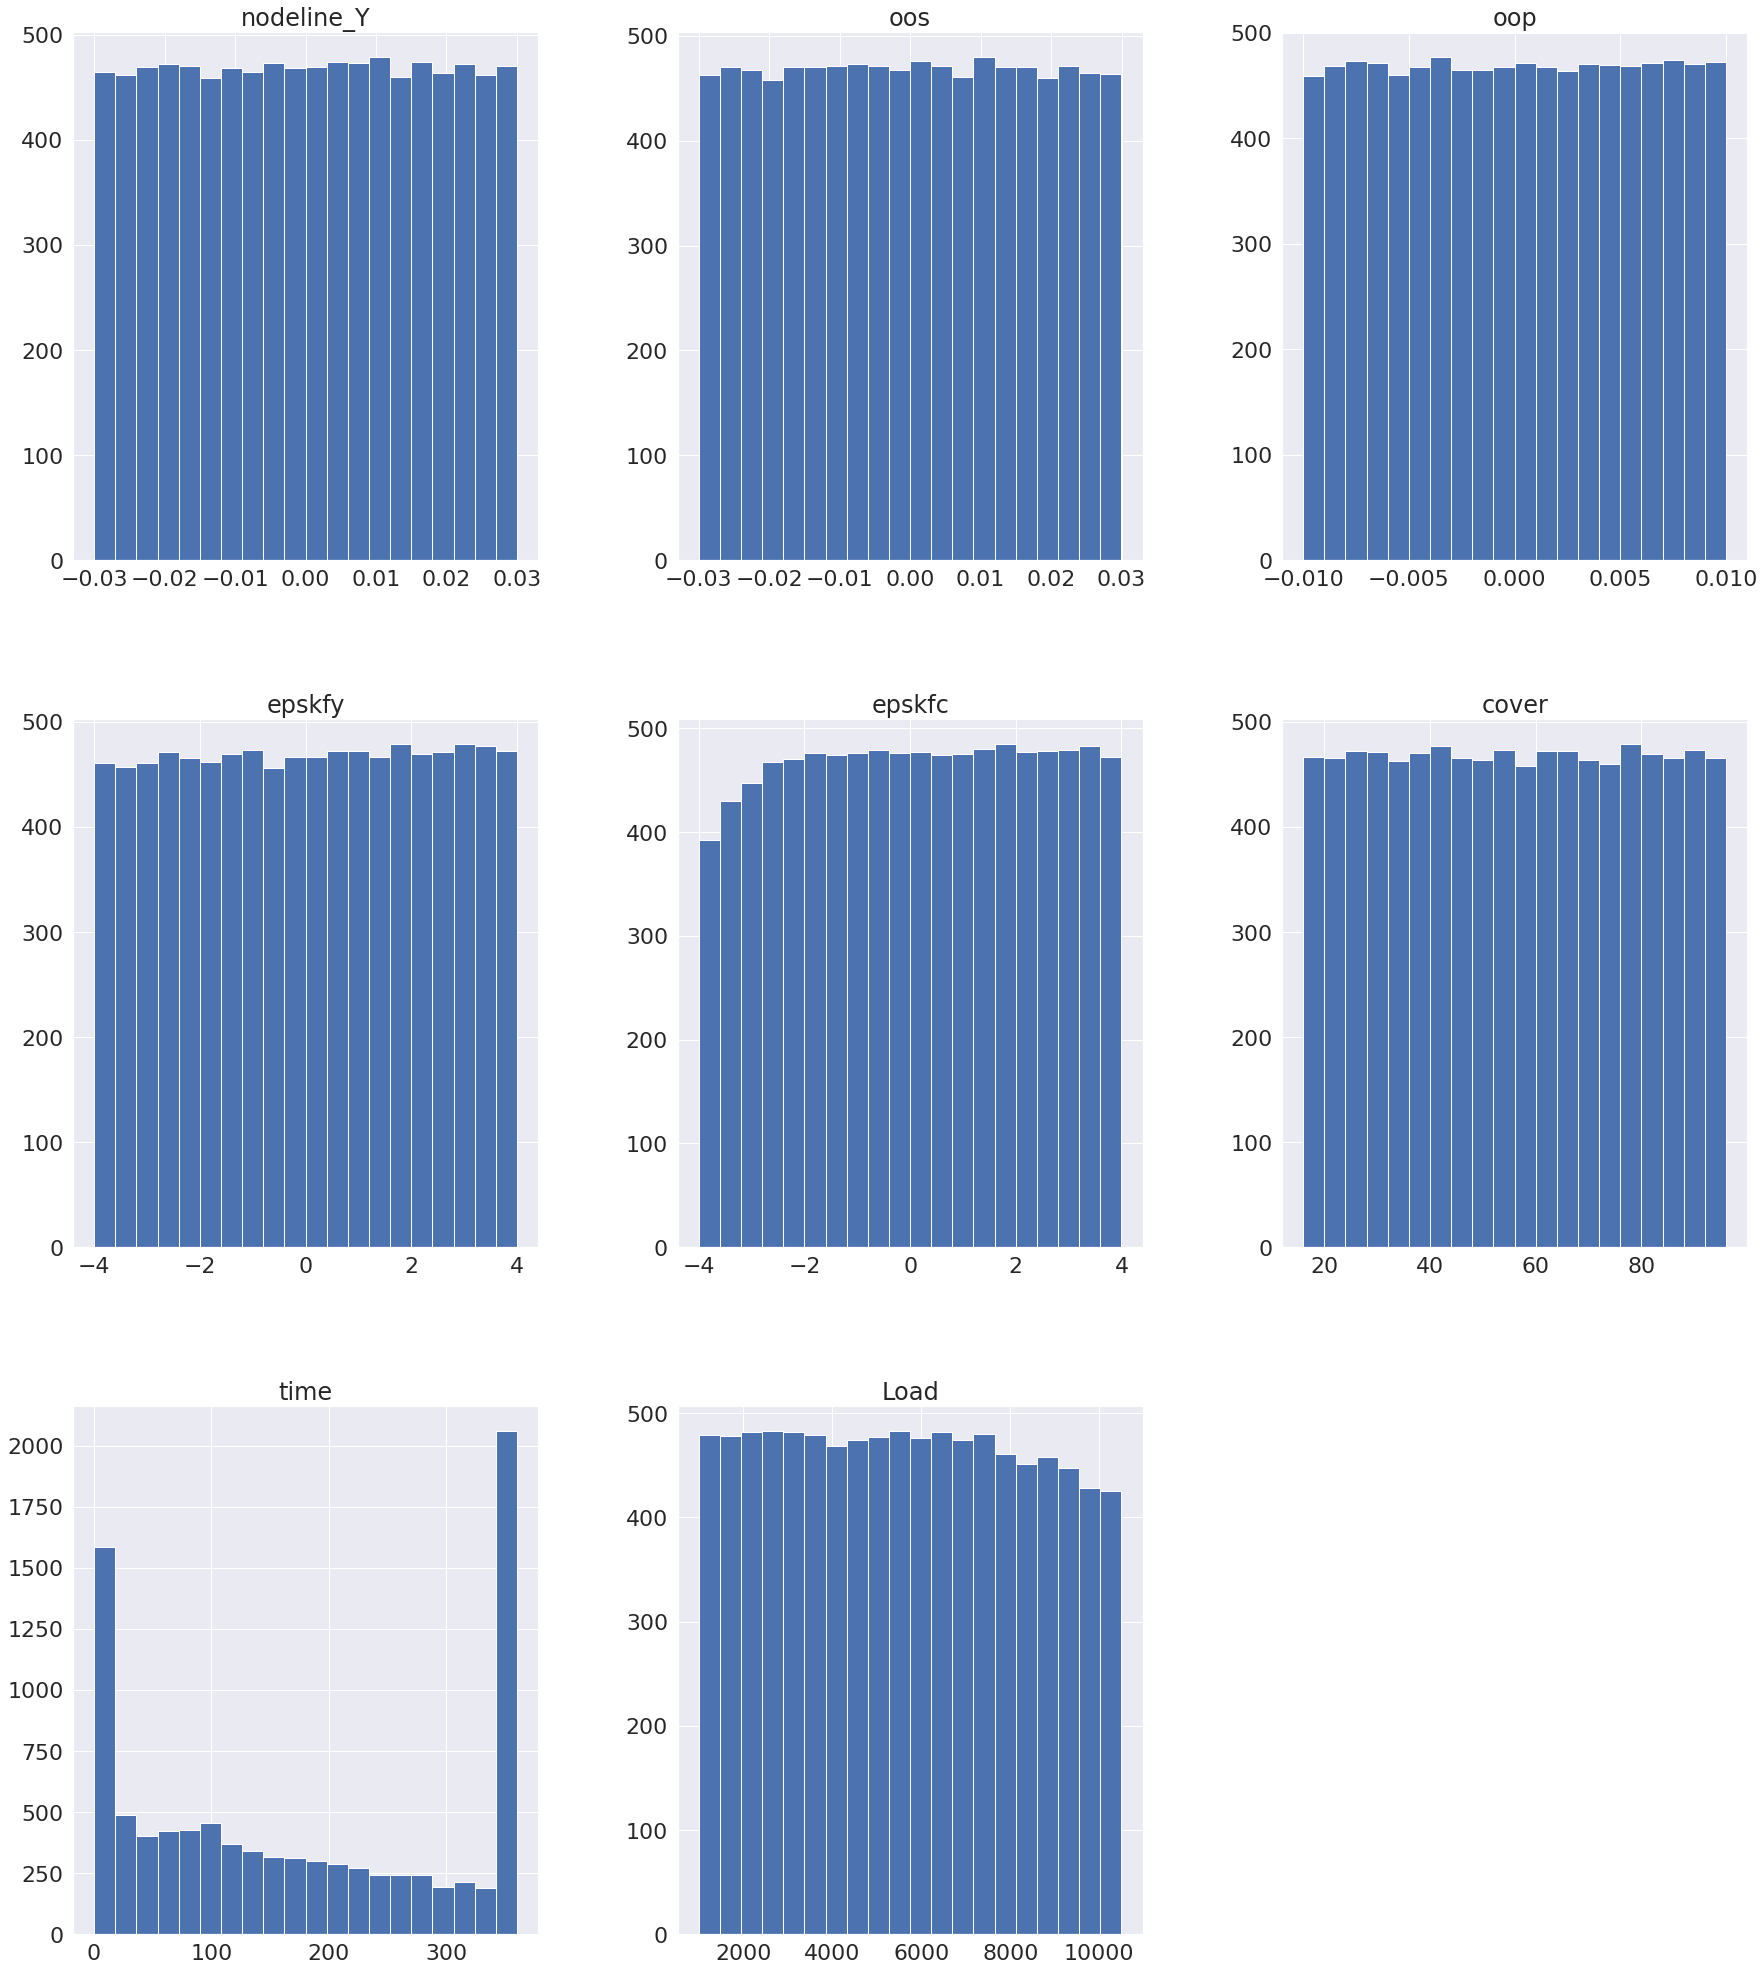

In [18]:
sn.set(font_scale=2)
train_data.hist(figsize=(30,35),bins=20)
plt.show()

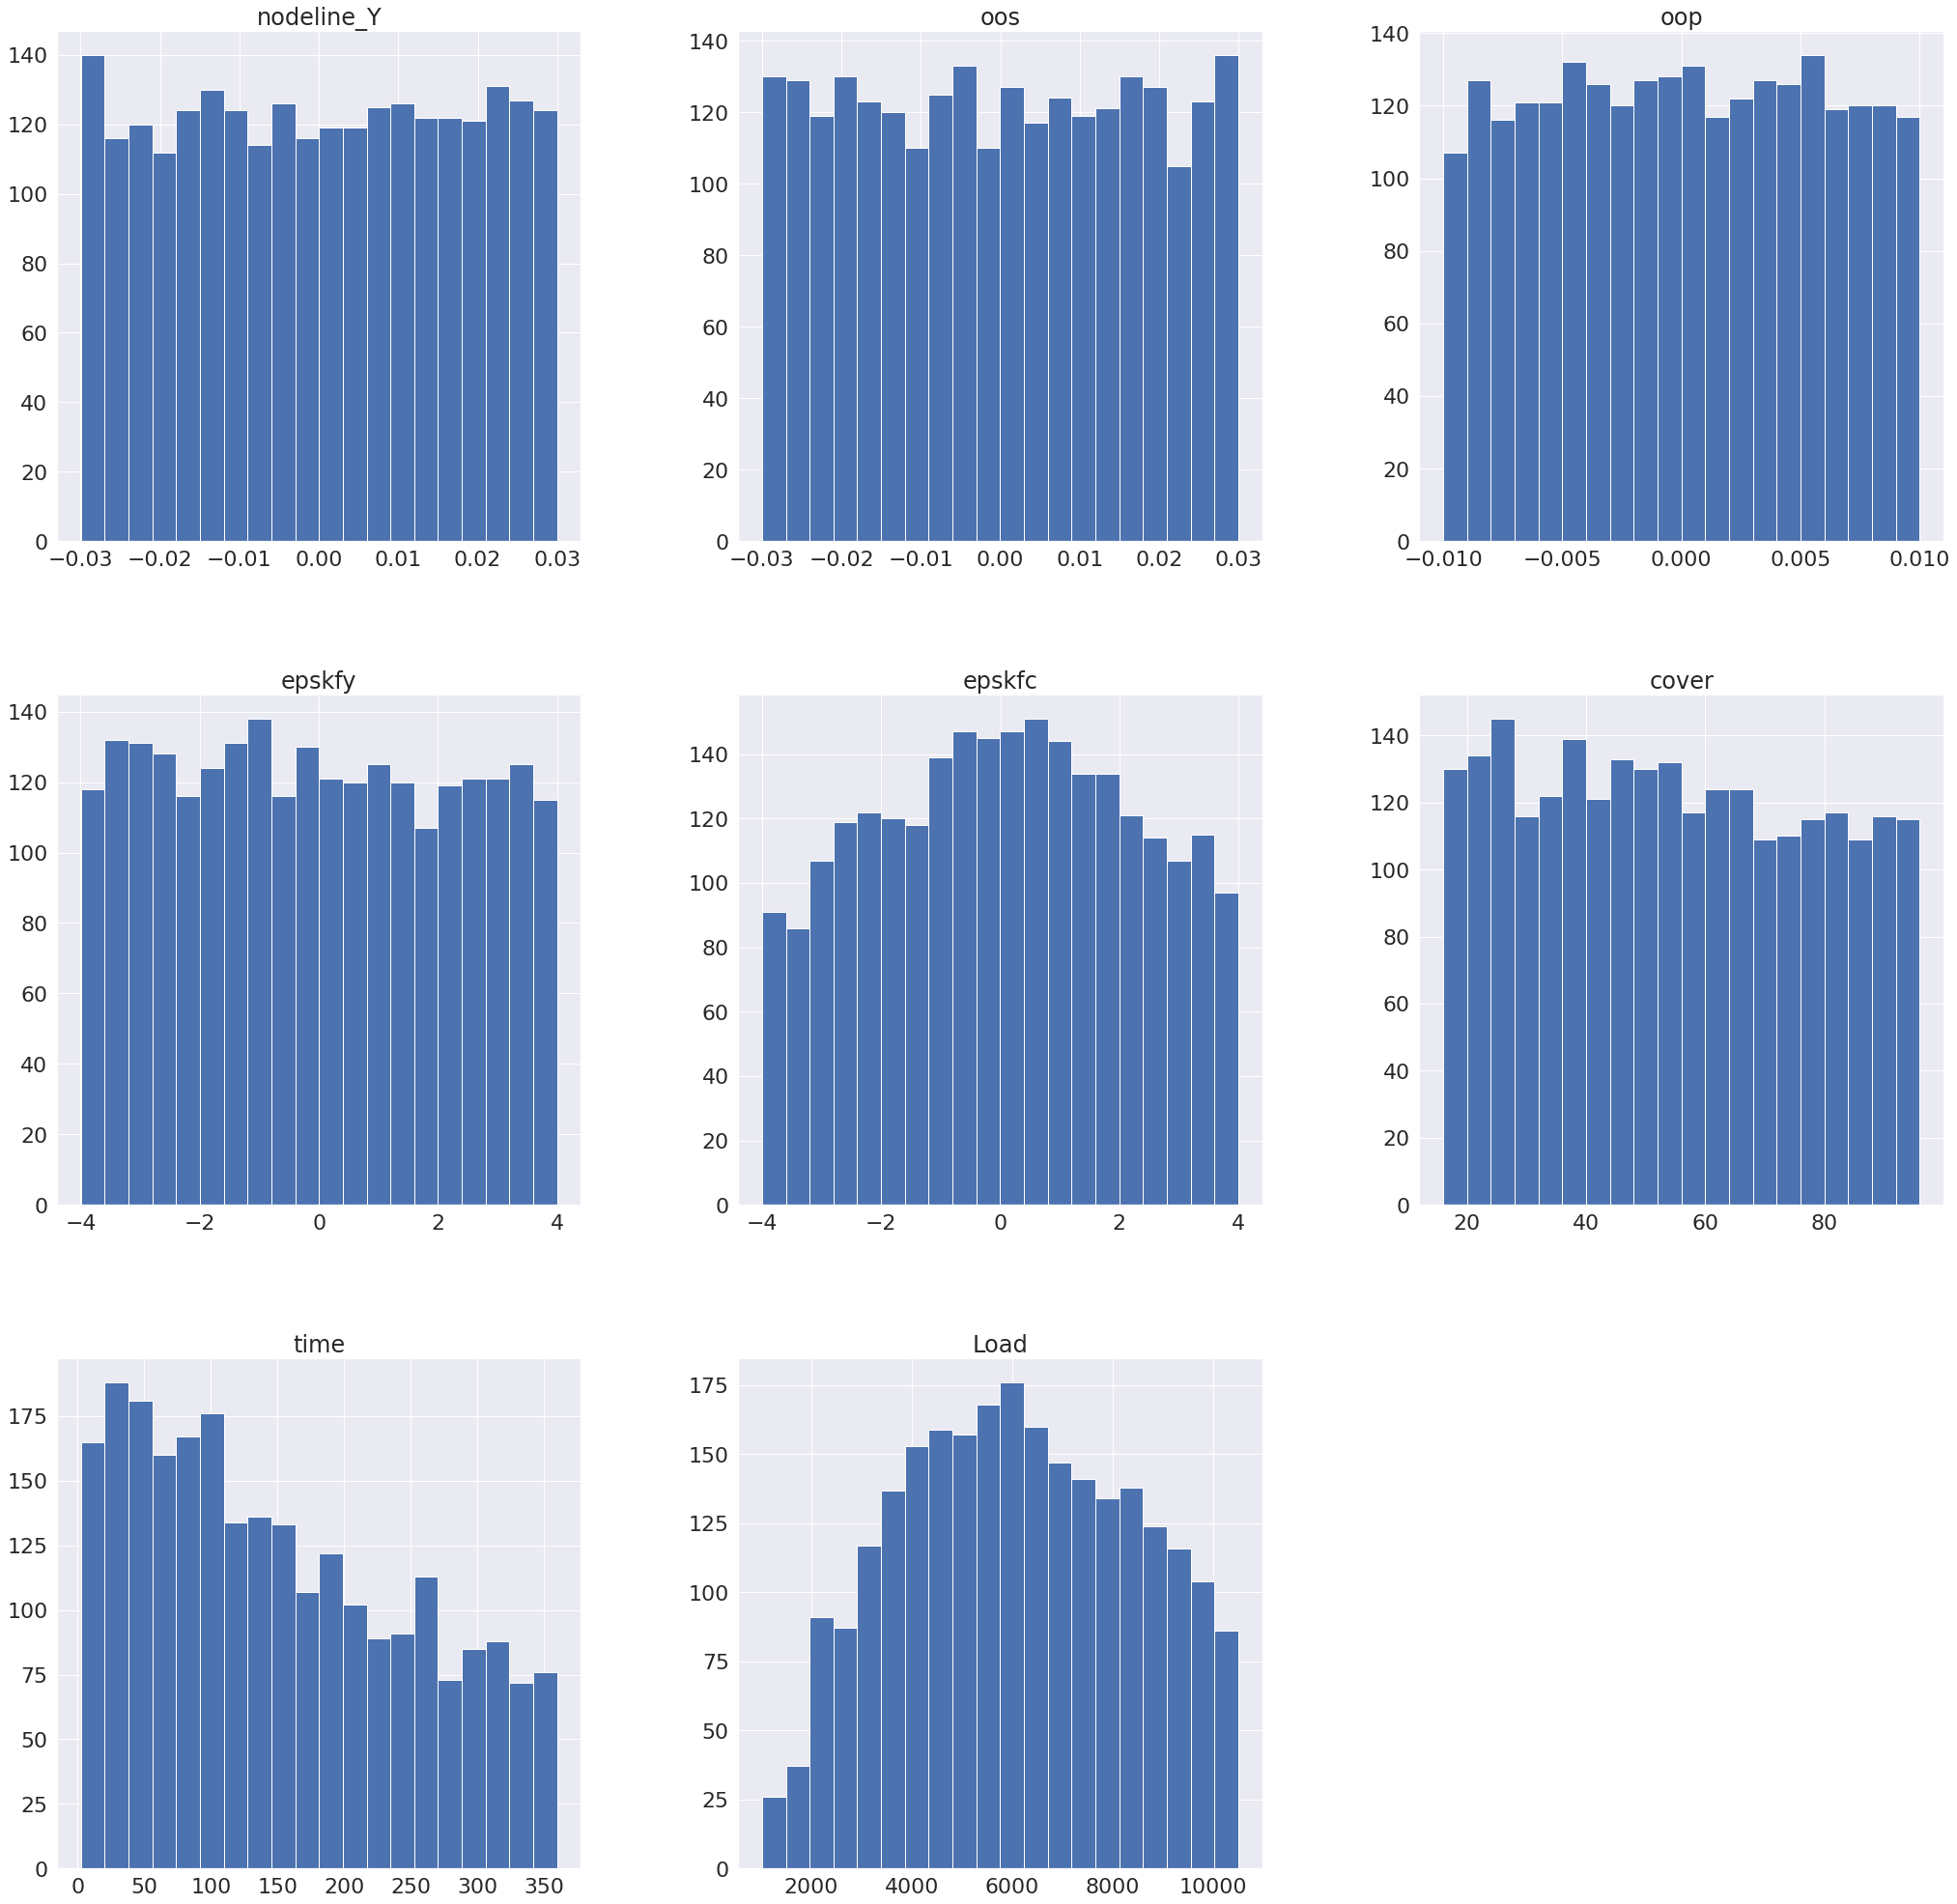

In [19]:
sn.set(font_scale=2)
test_data.hist(figsize=(35,35),bins=20)
plt.show()

In [20]:
def outliers_removal(data_frame, column):
    # Step-1 sorting the data
    sorted(data_frame)
    #Step-2 finding the quartiles
    Q3=np.percentile(data_frame[column], 75)
    Q1=np.percentile(data_frame[column], 25)
    # Calculating Inter Quartile Range
    IQR=Q3-Q1
    # Calculating the bounds
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    # Removing the outliers
    data_frame.drop(data_frame[ (data_frame[column] > upper_bound) | (data_frame[column] < lower_bound) ].index , inplace=True)
    return data_frame

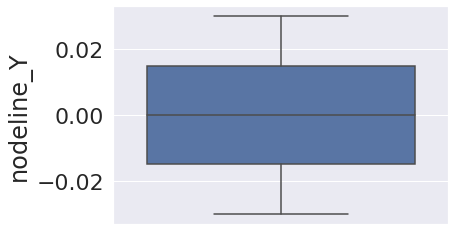

In [21]:
sn.boxplot(y=train_input['nodeline_Y'])
plt.show()

No, outlier

In [22]:
'oos', 'oop', 'epskfy', 'epskfc', 'cover', 'time'

('oos', 'oop', 'epskfy', 'epskfc', 'cover', 'time')

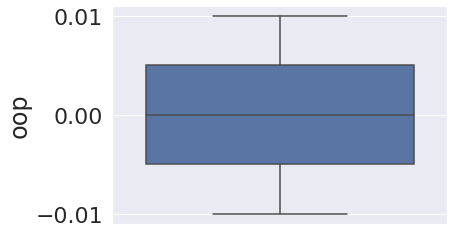

In [23]:
sn.boxplot(y=train_input['oop'])
plt.show()

No, outlier

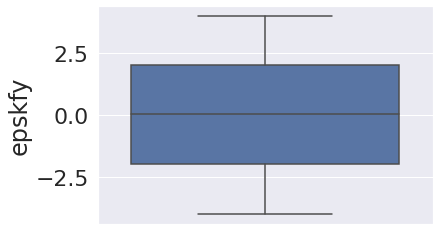

In [24]:
sn.boxplot(y=train_input['epskfy'])
plt.show()

No, outlier

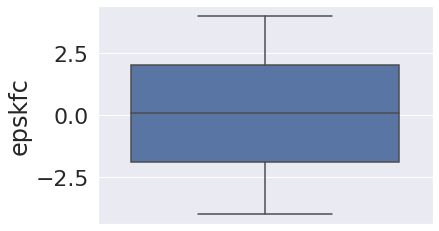

In [25]:
sn.boxplot(y=train_input['epskfc'])
plt.show()

No outilers

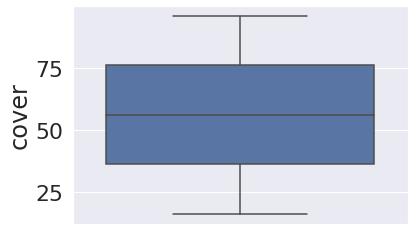

In [26]:
sn.boxplot(y=train_input['cover'])
plt.show()

No, outlier

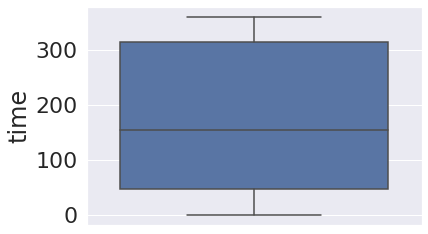

In [27]:
sn.boxplot(y=train_input['time'])
plt.show()

No, outlier

**Checking Pearson Corrleation**

Pearson check the linearity
Spearman check montonacity
Kindeal check the same as that of spearman in a error known mode

In [28]:
train_data=pd.concat([train_input, train_output], axis=1)

In [29]:
train_data.columns

Index(['nodeline_Y', 'oos', 'oop', 'epskfy', 'epskfc', 'cover', 'time',
       'Load'],
      dtype='object')

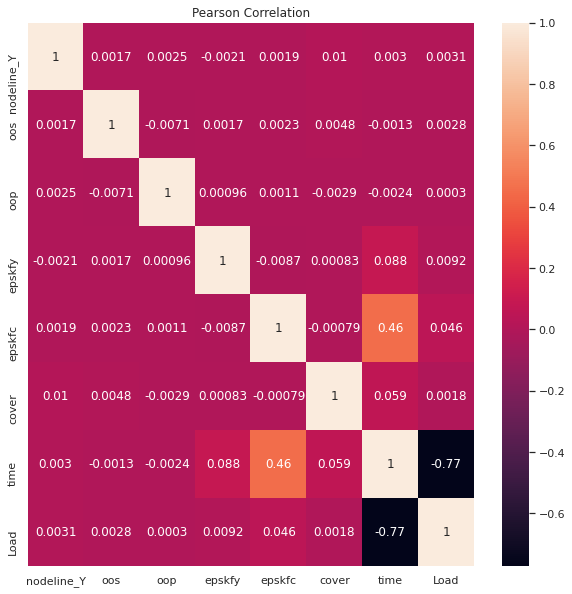

In [30]:
sn.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,10))
# Pearson Correlation
pearson_corr_data = train_data.corr(method='pearson')
sn.heatmap(pearson_corr_data,annot=True)
ax.set_title('Pearson Correlation')
plt.savefig("Pearson_Corr.png")

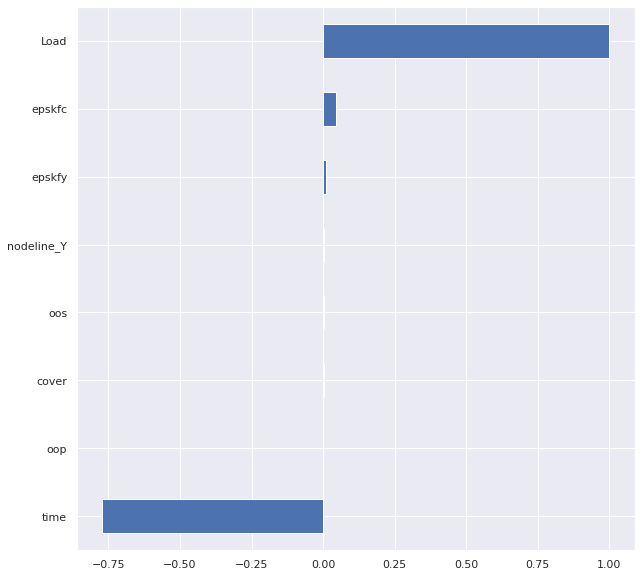

In [31]:
plt.figure(figsize=(10,10))
pearson_corr_data['Load'].sort_values().plot(kind="barh")

In [32]:
pearson_corr_data['Load'].sort_values(ascending=False)

Load          1.000000
epskfc        0.045751
epskfy        0.009192
nodeline_Y    0.003121
oos           0.002843
cover         0.001750
oop           0.000298
time         -0.772478
Name: Load, dtype: float64

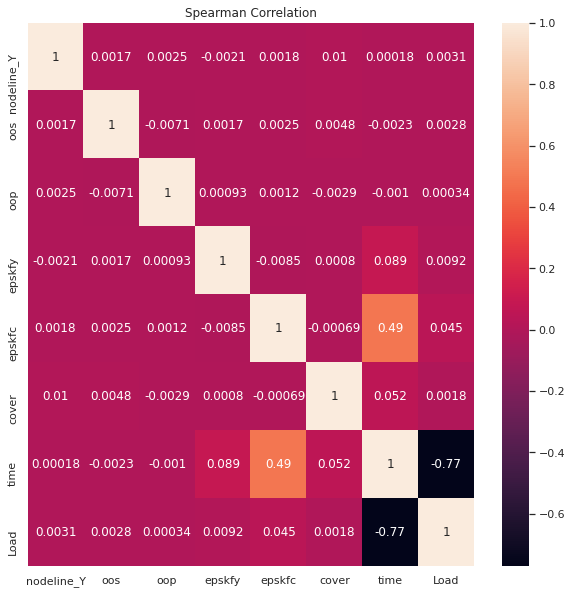

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
# spearman Correlation
spearman_corr_data =train_data.corr(method='spearman')
sn.heatmap(spearman_corr_data ,annot=True)
ax.set_title('Spearman Correlation')
plt.savefig("Spearman_Corr.png")

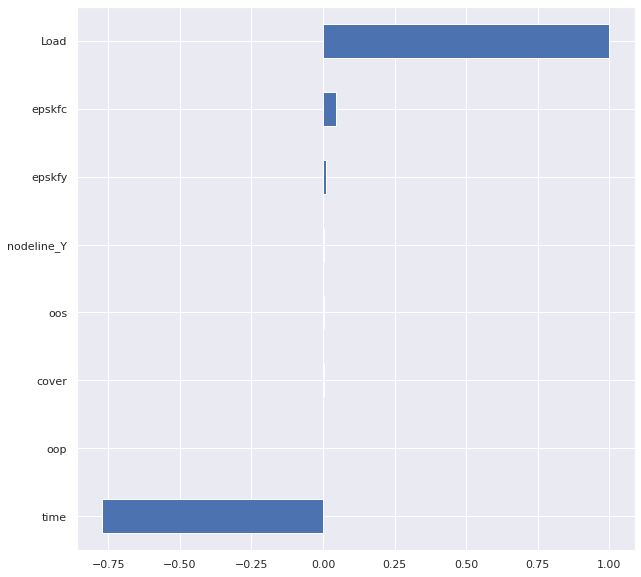

In [34]:
plt.figure(figsize=(10,10))
spearman_corr_data["Load"].sort_values().plot(kind="barh")

In [35]:
spearman_corr_data['Load'].sort_values(ascending=False)

Load          1.000000
epskfc        0.044816
epskfy        0.009218
nodeline_Y    0.003088
oos           0.002813
cover         0.001820
oop           0.000340
time         -0.771823
Name: Load, dtype: float64

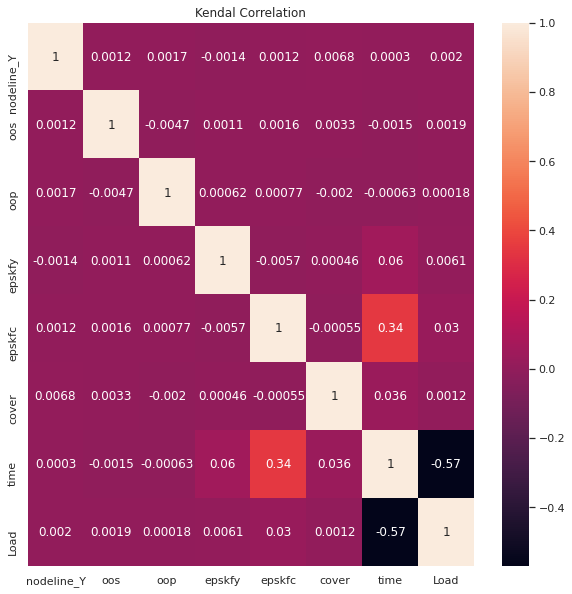

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
# spearman Correlation
kendal_corr_data = train_data.corr(method='kendall')
sn.heatmap(kendal_corr_data ,annot=True)
ax.set_title('Kendal Correlation')
plt.savefig("Kindall_Corr.png")

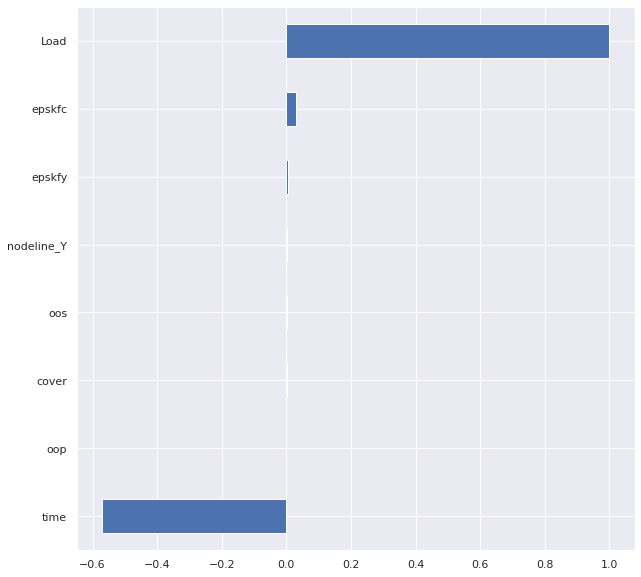

In [37]:
plt.figure(figsize=(10,10))
kendal_corr_data["Load"].sort_values().plot(kind="barh")

In [38]:
kendal_corr_data['Load'].sort_values(ascending=False)

Load          1.000000
epskfc        0.029863
epskfy        0.006124
nodeline_Y    0.002034
oos           0.001930
cover         0.001171
oop           0.000182
time         -0.570908
Name: Load, dtype: float64

In [39]:
sc_X = StandardScaler()
X_data = sc_X.fit_transform(train_input)
data_std=pd.DataFrame(X_data)

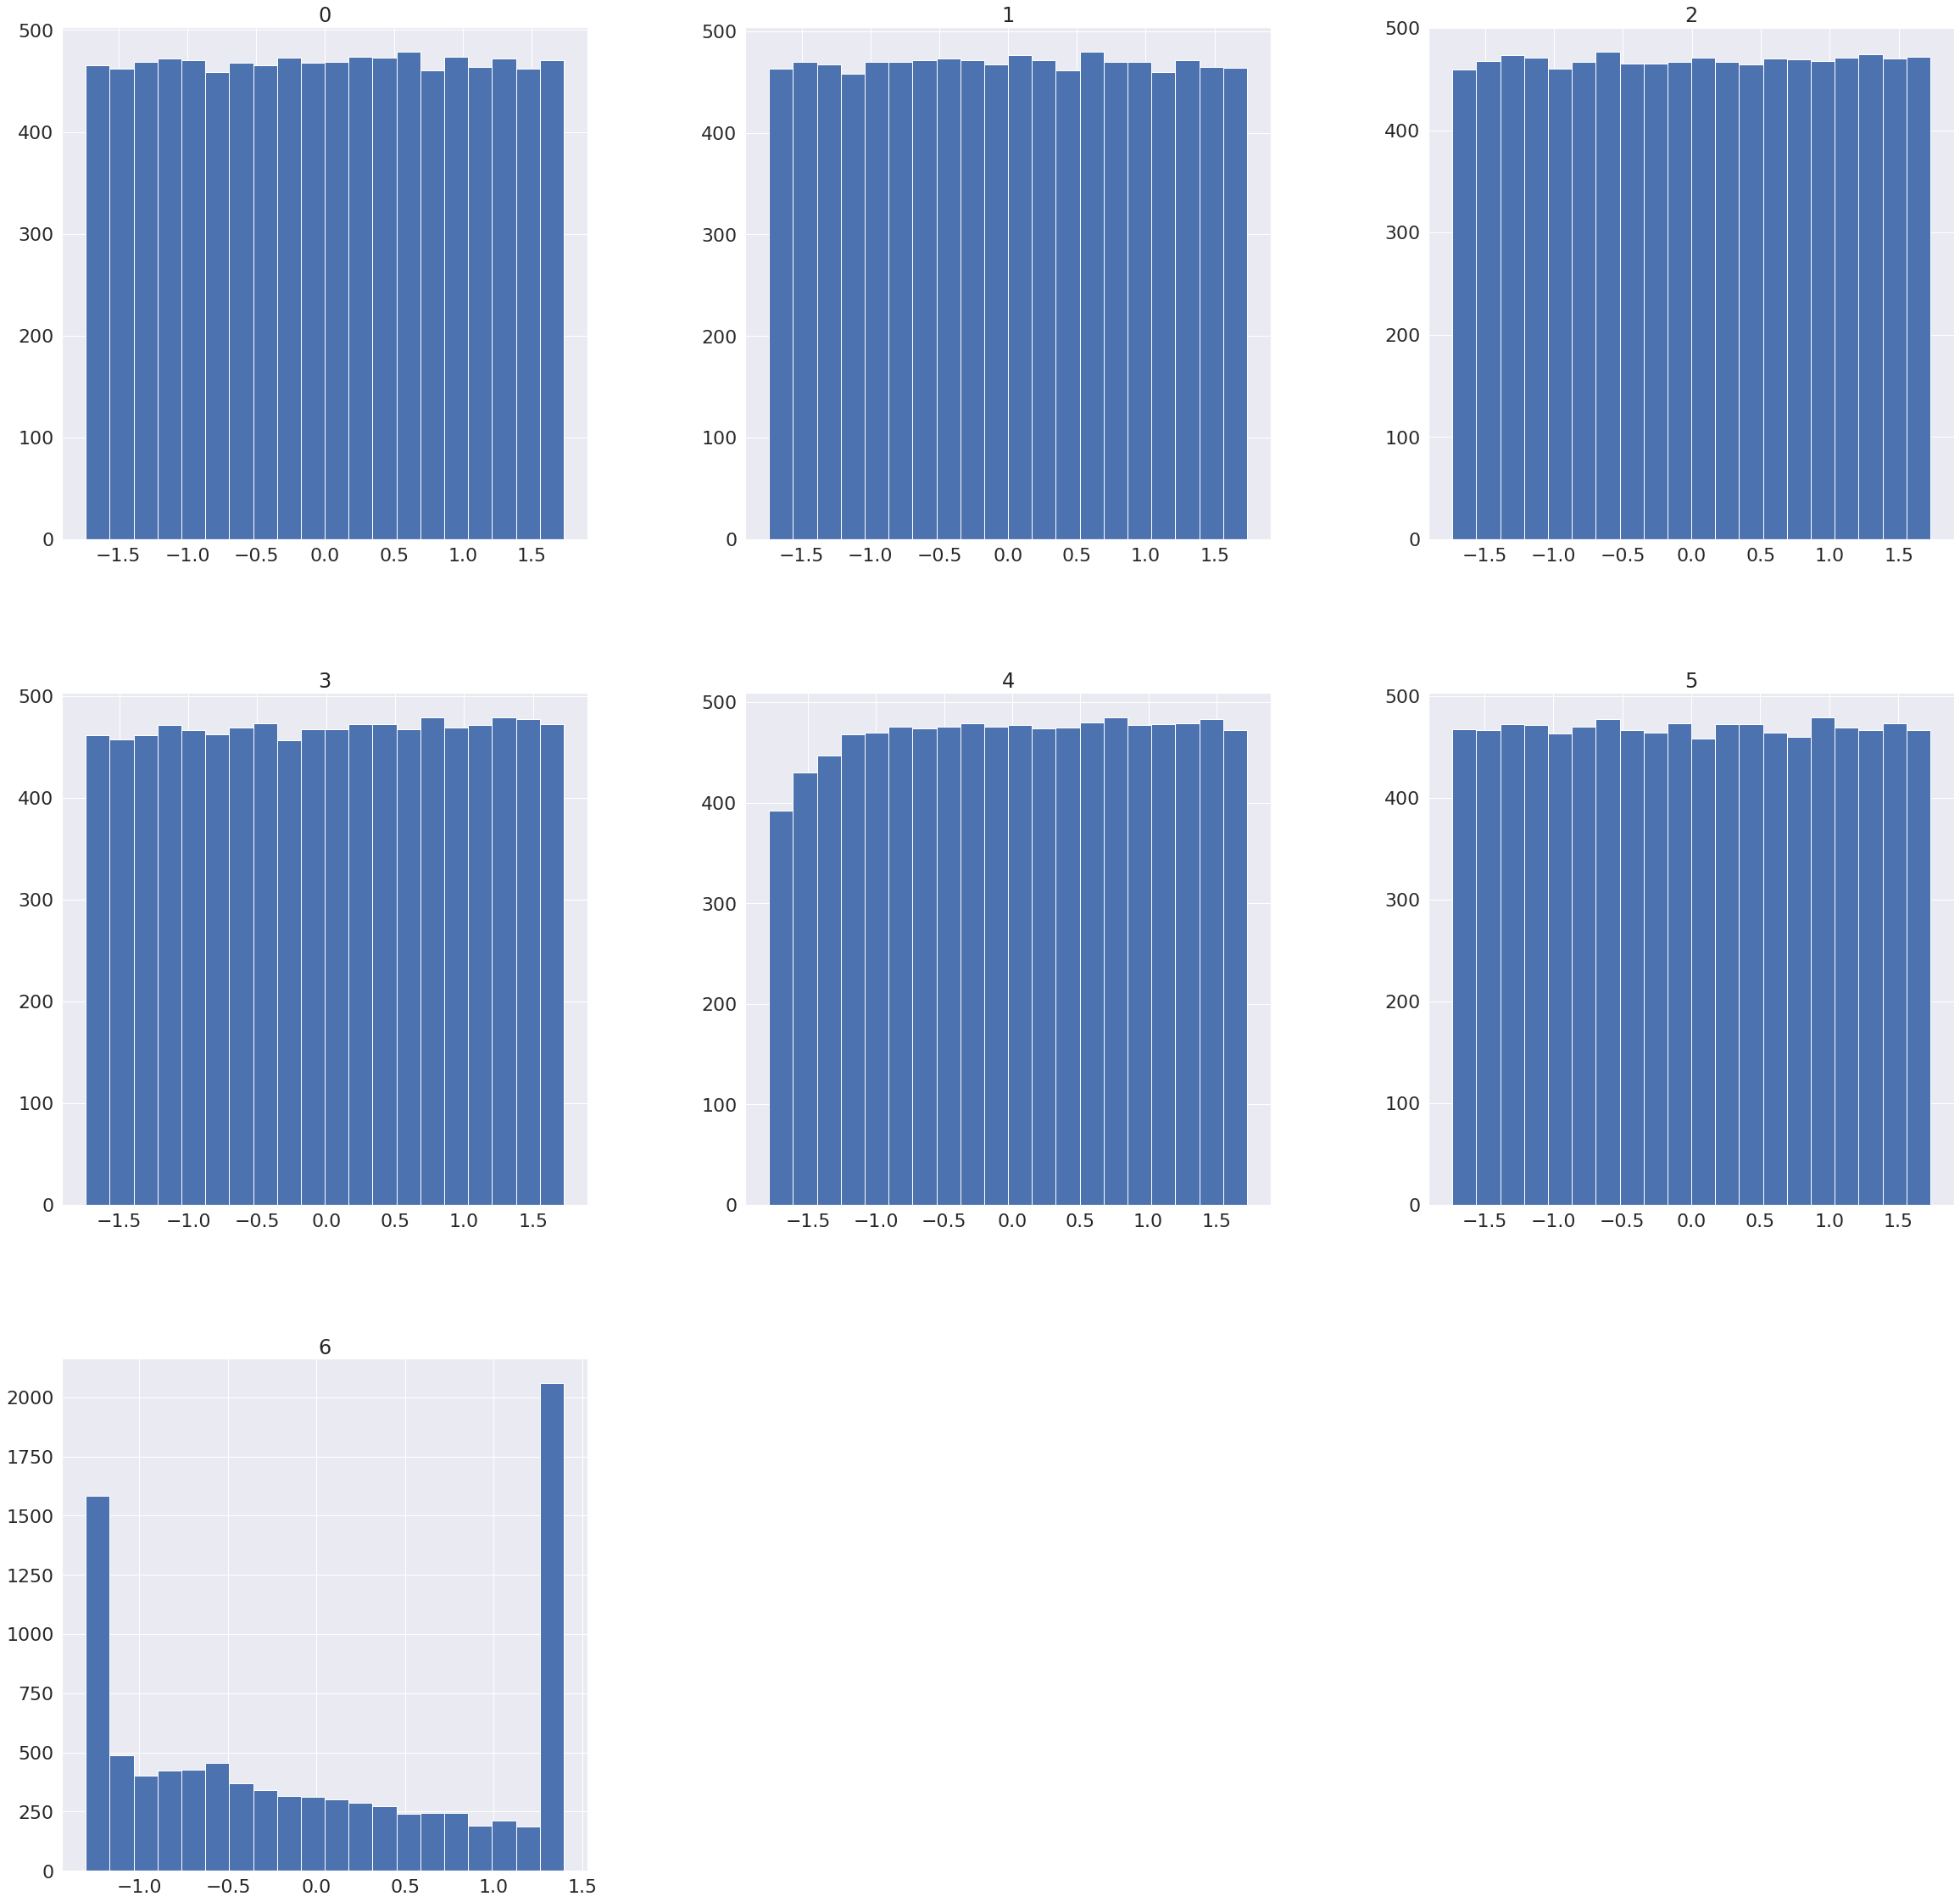

In [40]:
sn.set(font_scale=2)
data_std.hist(figsize=(40,40),bins=20)
plt.show()

# Final Data Preparation

In [41]:
X_train=train_input.values
Y_train=train_output.values/1000
X_test=test_input.values
Y_test=test_output.values/1000

# Train and Test split


In [42]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Selection  of Regression algorithm

For the selection of suitable regression algorithm. We have to analyze the relationship between the attributes and the dependent variable.

As, the correlation between the inputs/attributes and the dependent variables is not above 0.7 of correlation measure. Therefore, it is indicating non-linear relation ship between the attributes and the dependent variable inspite of time which is indicating only relationship

**Using simple Multi_Linear Regression**

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
LM=LinearRegression()
LM.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
Y_pred=LM.predict(X_test)

In [48]:
# Metrics
SROCC=spearmanr(Y_test,Y_pred)
KROCC=kendalltau(Y_test,Y_pred)
R_square=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [49]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)
print("The Spearman for the data is = ",SROCC)
print("The Kendall correlation for the data is = ",KROCC)

The computed root mean squared error is =  1.0367579026881746
The computed mean absolute error is =  0.8471173624035337
The r2 measure for the model is =  0.8011835185064271
The Spearman for the data is =  SpearmanrResult(correlation=0.9040377426882753, pvalue=0.0)
The Kendall correlation for the data is =  KendalltauResult(correlation=0.7272322349620967, pvalue=0.0)


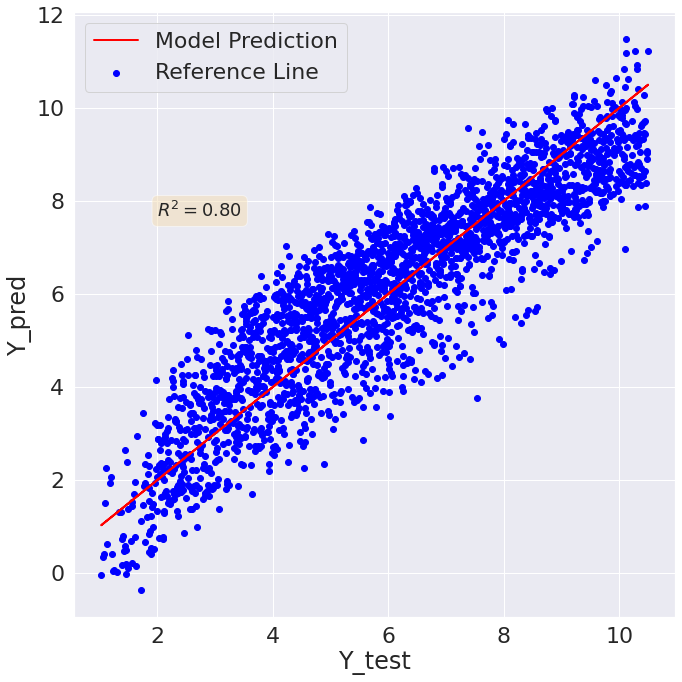

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red', linewidth=2,label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 8, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()



---



**Using Ensemble Learning**

Ensembel models ususally perform better as compared to the normal models in most of the cases as they use some basic individual model as base learners and then design a met-model from all of these in the final stage. Therefore, using gradient boosting as first model by using the XGBOOST library

In [52]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from numpy import absolute

In [53]:
#setting one 
model=XGBRegressor()
model.fit(X_train,Y_train)

[21:43:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [54]:
Y_pred=model.predict(X_test)

In [55]:
# Metrics
SROCC=spearmanr(Y_test,Y_pred)
KROCC=kendalltau(Y_test,Y_pred)
R_square=r2_score(Y_test,Y_pred)
mse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [56]:
print("The computed mean squared error is = ",mse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)
print("The Spearman for the data is = ",SROCC)
print("The Kendall correlation for the data is = ",KROCC)

The computed mean squared error is =  0.5844247896599063
The computed mean absolute error is =  0.4506280001901436
The r2 measure for the model is =  0.9368235914953338
The Spearman for the data is =  SpearmanrResult(correlation=0.9719216856489444, pvalue=0.0)
The Kendall correlation for the data is =  KendalltauResult(correlation=0.8558350909856199, pvalue=0.0)


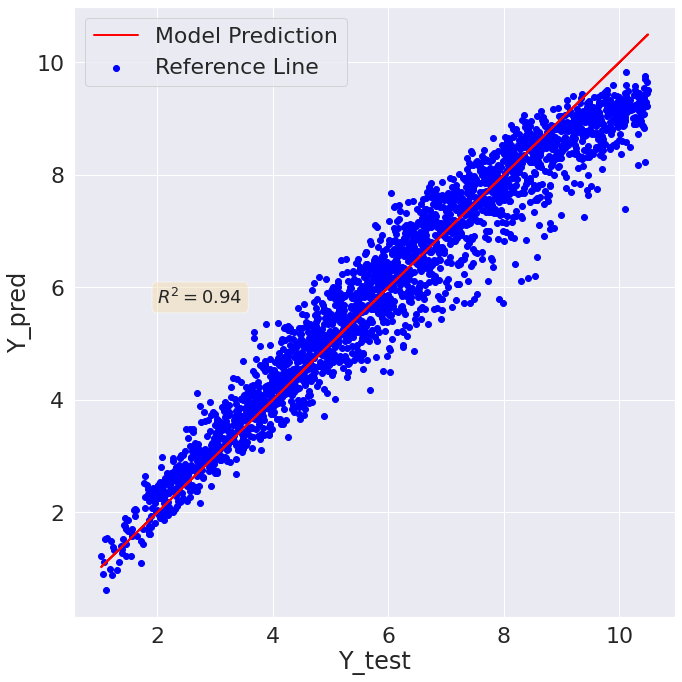

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red', linewidth=2,label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 6, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()



---



Tree Based Ensembel Exploring other settings

In [58]:
from xgboost import plot_importance
from matplotlib import pyplot

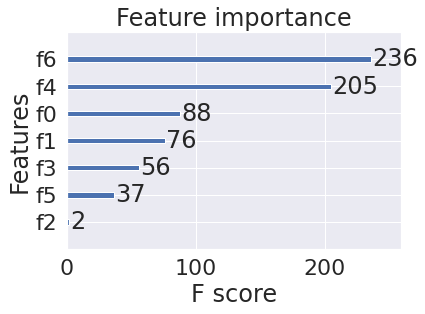

In [59]:
plot_importance(model)
pyplot.show()



---



**Using Random Forest Regression**

It's a type of ensemble 

In [60]:
from sklearn.ensemble import RandomForestRegressor
RF_reg=RandomForestRegressor(n_estimators = 300, max_features = 'auto', min_samples_leaf=2, random_state=1)

In [61]:
RF_reg.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [62]:
Y_pred=RF_reg.predict(X_test)

In [63]:
# Metrics
SROCC=spearmanr(Y_test,Y_pred)
KROCC=kendalltau(Y_test,Y_pred)
R_square=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [64]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)
print("The Spearman for the data is = ",SROCC)
print("The Kendall correlation for the data is = ",KROCC)

The computed root mean squared error is =  0.6929618117639096
The computed mean absolute error is =  0.5480954578559833
The r2 measure for the model is =  0.9111788731788368
The Spearman for the data is =  SpearmanrResult(correlation=0.9551668204996954, pvalue=0.0)
The Kendall correlation for the data is =  KendalltauResult(correlation=0.812870551682594, pvalue=0.0)


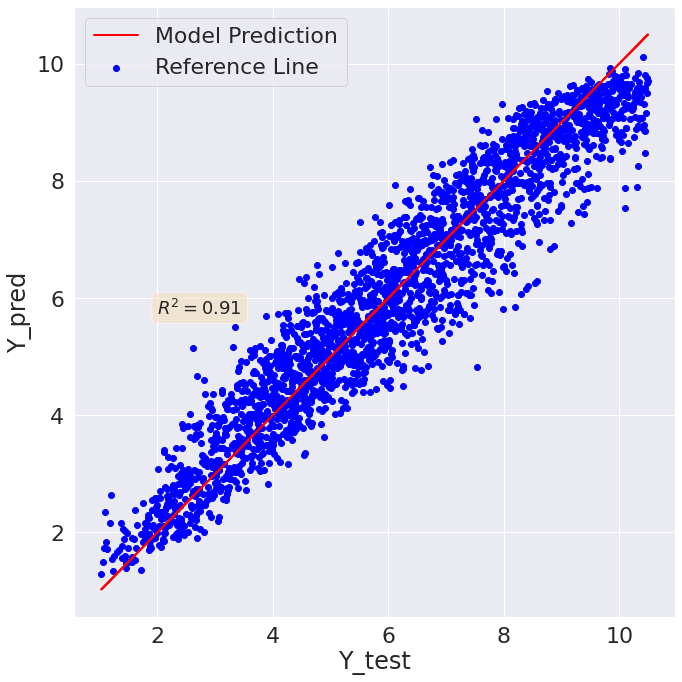

In [65]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red', linewidth=2,label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 6, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()



---



**Neural Network**

In [66]:
from sklearn.neural_network  import MLPRegressor

In [67]:
MLP_regressor = MLPRegressor(max_iter=1000)
MLP_regressor.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [68]:
Y_pred=MLP_regressor.predict(X_test)

In [69]:
# Metrics
SROCC=spearmanr(Y_test,Y_pred)
KROCC=kendalltau(Y_test,Y_pred)
R_square=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [70]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)
print("The Spearman for the data is = ",SROCC)
print("The Kendall correlation for the data is = ",KROCC)

The computed root mean squared error is =  0.3636901669070684
The computed mean absolute error is =  0.23784513881305103
The r2 measure for the model is =  0.9755341227100913
The Spearman for the data is =  SpearmanrResult(correlation=0.9900120564755318, pvalue=0.0)
The Kendall correlation for the data is =  KendalltauResult(correlation=0.9242965996424093, pvalue=0.0)


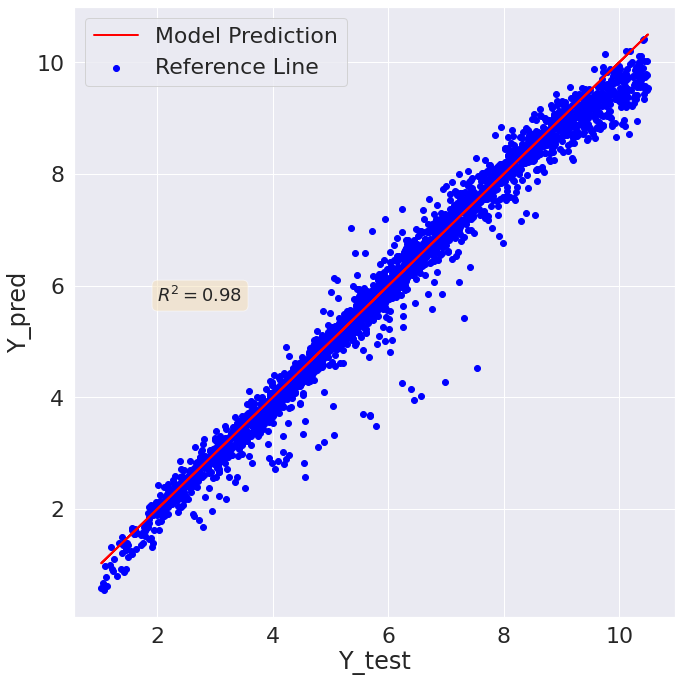

In [71]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red', linewidth=2,label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 6, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()



---



**Support Vector Machine**

In [72]:
from sklearn.svm import SVR
model = SVR(kernel='linear')

In [73]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [74]:
Y_pred=model.predict(X_test)

In [75]:
# Metrics
SROCC=spearmanr(Y_test,Y_pred)
KROCC=kendalltau(Y_test,Y_pred)
R_square=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [76]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)
print("The Spearman for the data is = ",SROCC)
print("The Kendall correlation for the data is = ",KROCC)

The computed root mean squared error is =  1.011291396926968
The computed mean absolute error is =  0.8272319325650002
The r2 measure for the model is =  0.8108308553212622
The Spearman for the data is =  SpearmanrResult(correlation=0.9095807973595716, pvalue=0.0)
The Kendall correlation for the data is =  KendalltauResult(correlation=0.7351775187413918, pvalue=0.0)


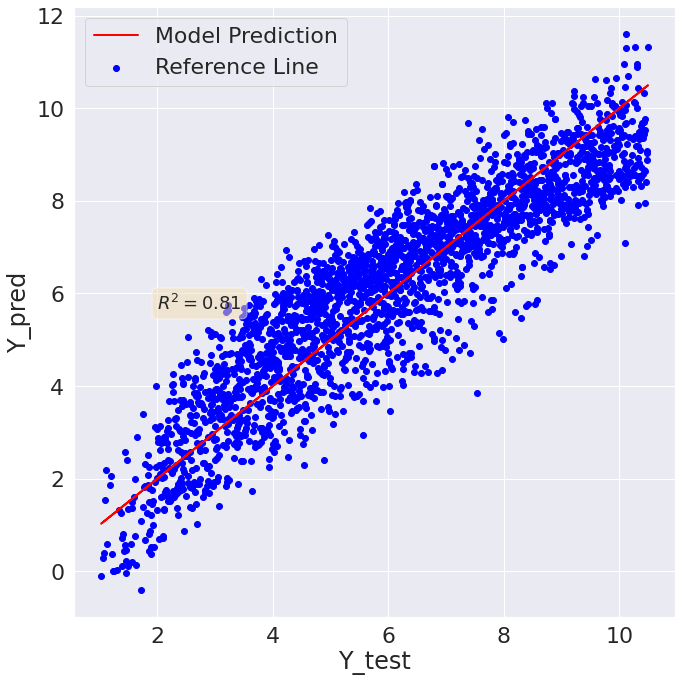

In [77]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red', linewidth=2,label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 6, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()



---



**SVM with polynomial kernel degree 3**

In [78]:
SVR_poly=SVR(kernel='poly',degree=3,gamma= 'auto')

In [79]:
SVR_poly.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [80]:
Y_pred=SVR_poly.predict(X_test)

In [81]:
# Metrics
SROCC=spearmanr(Y_test,Y_pred)
KROCC=kendalltau(Y_test,Y_pred)
R_square=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [82]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)
print("The Spearman for the data is = ",SROCC)
print("The Kendall correlation for the data is = ",KROCC)

The computed root mean squared error is =  1.1972269788404921
The computed mean absolute error is =  0.9642304224217186
The r2 measure for the model is =  0.734875010384458
The Spearman for the data is =  SpearmanrResult(correlation=0.8827768374373378, pvalue=0.0)
The Kendall correlation for the data is =  KendalltauResult(correlation=0.6960326236160248, pvalue=0.0)


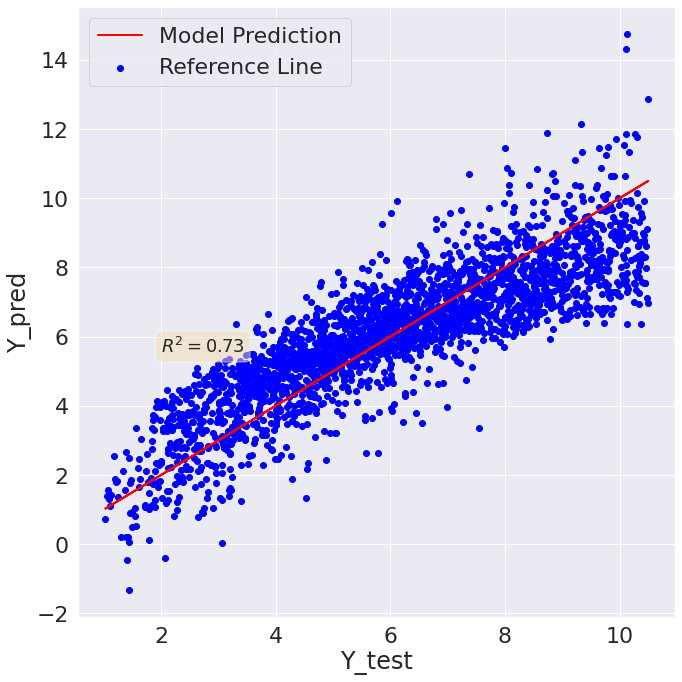

In [83]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red', linewidth=2,label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 6, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()



---



**SVR with RBF**

In [84]:
SVR_rbf=SVR(kernel='rbf')

In [85]:
SVR_rbf.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [86]:
Y_pred=SVR_rbf.predict(X_test)

In [87]:
# Metrics
SROCC=spearmanr(Y_test,Y_pred)
KROCC=kendalltau(Y_test,Y_pred)
R_square=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [88]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)
print("The Spearman for the data is = ",SROCC)
print("The Kendall correlation for the data is = ",KROCC)

The computed root mean squared error is =  0.4428466844230464
The computed mean absolute error is =  0.2933271205241585
The r2 measure for the model is =  0.9637252465153493
The Spearman for the data is =  SpearmanrResult(correlation=0.9818465660898317, pvalue=0.0)
The Kendall correlation for the data is =  KendalltauResult(correlation=0.8984591938212769, pvalue=0.0)


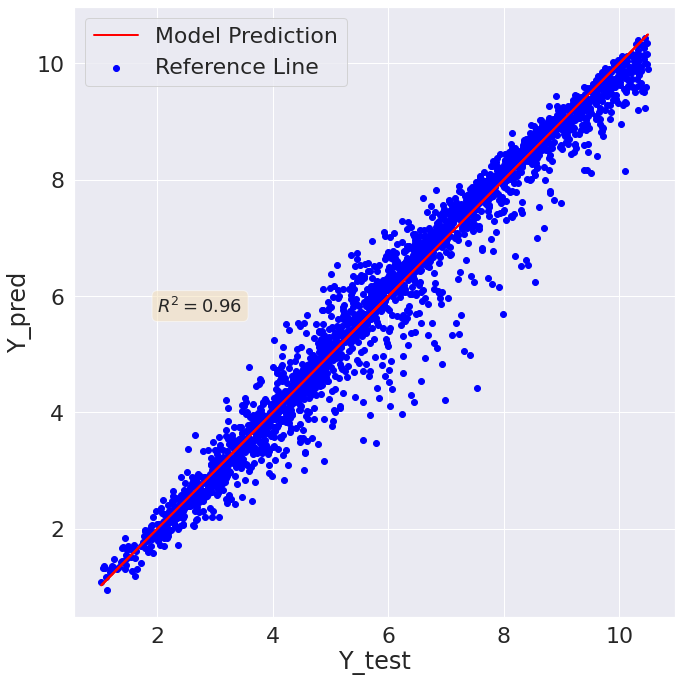

In [89]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red', linewidth=2,label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 6, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()



---



**SVR with sigmoid**

In [90]:
SVR_sigmoid=SVR(kernel='sigmoid')

In [91]:
SVR_sigmoid.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [92]:
Y_pred=SVR_rbf.predict(X_test)

In [93]:
# Metrics
SROCC=spearmanr(Y_test,Y_pred)
KROCC=kendalltau(Y_test,Y_pred)
R_square=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [94]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)
print("The Spearman for the data is = ",SROCC)
print("The Kendall correlation for the data is = ",KROCC)

The computed root mean squared error is =  0.4428466844230464
The computed mean absolute error is =  0.2933271205241585
The r2 measure for the model is =  0.9637252465153493
The Spearman for the data is =  SpearmanrResult(correlation=0.9818465660898317, pvalue=0.0)
The Kendall correlation for the data is =  KendalltauResult(correlation=0.8984591938212769, pvalue=0.0)


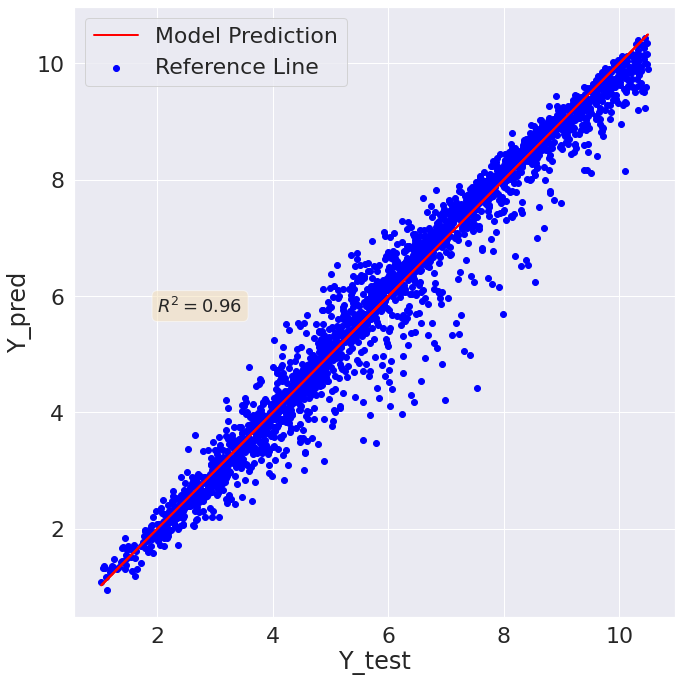

In [95]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red', linewidth=2,label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 6, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()



---



**Using K-Nearst Neighbor Regressor**

In [96]:
from sklearn.neighbors import KNeighborsRegressor

In [97]:
KNNR=KNeighborsRegressor(n_neighbors=20,algorithm='brute')

In [98]:
KNNR.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [99]:
Y_pred=KNNR.predict(X_test)

In [100]:
# Metrics
SROCC=spearmanr(Y_test,Y_pred)
KROCC=kendalltau(Y_test,Y_pred)
R_square=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [101]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)
print("The Spearman for the data is = ",SROCC)
print("The Kendall correlation for the data is = ",KROCC)

The computed root mean squared error is =  1.0866049086766314
The computed mean absolute error is =  0.8521194670463792
The r2 measure for the model is =  0.7816058504989554
The Spearman for the data is =  SpearmanrResult(correlation=0.9059938685429252, pvalue=0.0)
The Kendall correlation for the data is =  KendalltauResult(correlation=0.7365027314452045, pvalue=0.0)


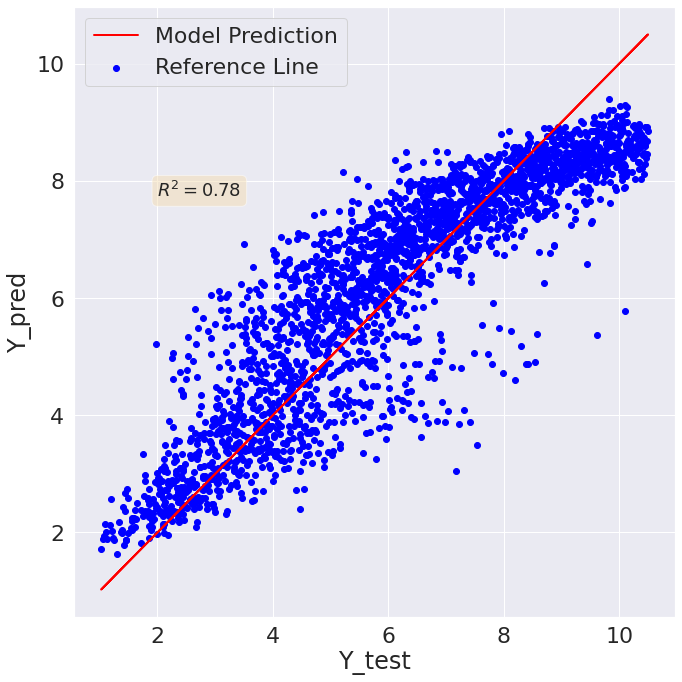

In [102]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red', linewidth=2,label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 8, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()



---



**Polynomial Regression**

In [103]:
from sklearn.preprocessing import PolynomialFeatures

In [104]:
polynomial_features= PolynomialFeatures(degree=2)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.fit_transform(X_test)

In [105]:
regressor = LinearRegression()  
regressor.fit(X_poly_train, Y_train) #training the algorithm
Y_pred = regressor.predict(X_poly_test)

In [106]:
# Metrics
SROCC=spearmanr(Y_test,Y_pred)
KROCC=kendalltau(Y_test,Y_pred)
R_square=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [107]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)
print("The Spearman for the data is = ",SROCC)
print("The Kendall correlation for the data is = ",KROCC)

The computed root mean squared error is =  0.7300805390966169
The computed mean absolute error is =  0.565237610309532
The r2 measure for the model is =  0.9014085579178566
The Spearman for the data is =  SpearmanrResult(correlation=0.950893402080999, pvalue=0.0)
The Kendall correlation for the data is =  KendalltauResult(correlation=0.8179340473888886, pvalue=0.0)


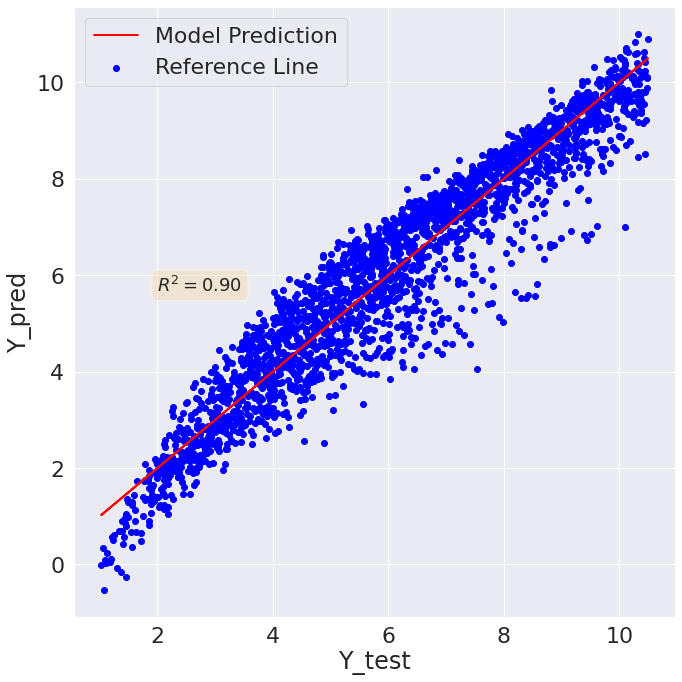

In [108]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red', linewidth=2,label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 6, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()

In [109]:
polynomial_features= PolynomialFeatures(degree=3)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.fit_transform(X_test)

In [110]:
regressor = LinearRegression()  
regressor.fit(X_poly_train, Y_train) #training the algorithm
Y_pred = regressor.predict(X_poly_test)

In [111]:
# Metrics
SROCC=spearmanr(Y_test,Y_pred)
KROCC=kendalltau(Y_test,Y_pred)
R_square=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [112]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)
print("The Spearman for the data is = ",SROCC)
print("The Kendall correlation for the data is = ",KROCC)

The computed root mean squared error is =  0.5672297736308352
The computed mean absolute error is =  0.4275165078185768
The r2 measure for the model is =  0.9404864698223327
The Spearman for the data is =  SpearmanrResult(correlation=0.9728553593113828, pvalue=0.0)
The Kendall correlation for the data is =  KendalltauResult(correlation=0.8627027675034185, pvalue=0.0)


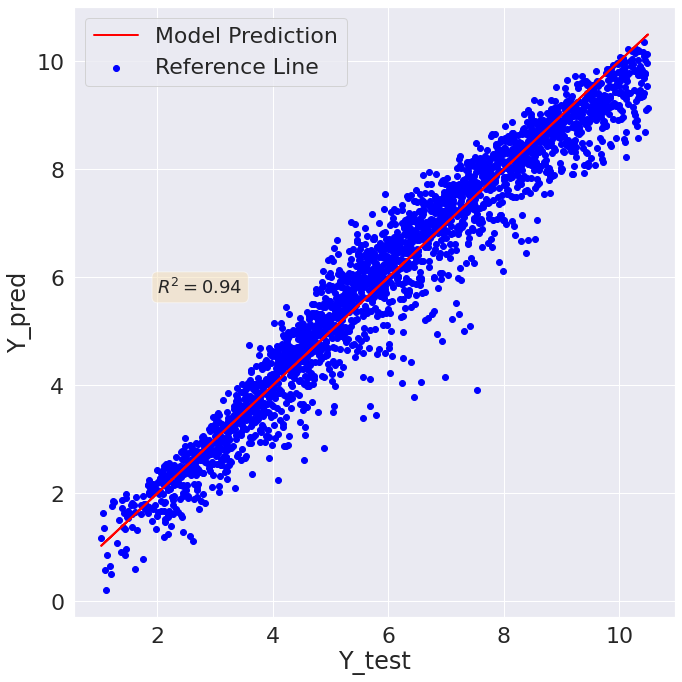

In [113]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red', linewidth=2,label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 6, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()

In [114]:
polynomial_features= PolynomialFeatures(degree=4)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.fit_transform(X_test)

In [115]:
regressor = LinearRegression()  
regressor.fit(X_poly_train, Y_train) #training the algorithm
Y_pred = regressor.predict(X_poly_test)

In [116]:
# Metrics
SROCC=spearmanr(Y_test,Y_pred)
KROCC=kendalltau(Y_test,Y_pred)
R_square=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [117]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)
print("The Spearman for the data is = ",SROCC)
print("The Kendall correlation for the data is = ",KROCC)

The computed root mean squared error is =  0.5112399609933619
The computed mean absolute error is =  0.3701769322270393
The r2 measure for the model is =  0.9516554790789067
The Spearman for the data is =  SpearmanrResult(correlation=0.9789346722012999, pvalue=0.0)
The Kendall correlation for the data is =  KendalltauResult(correlation=0.8811728196026871, pvalue=0.0)


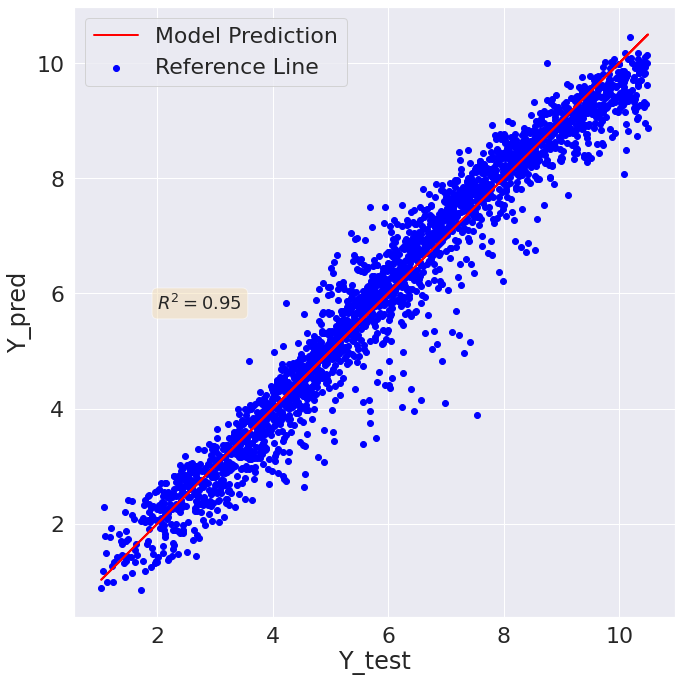

In [118]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red', linewidth=2,label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 6, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()



---



**Light Gardient Boosting**

In [119]:
import lightgbm as lgb

In [120]:
gbm = lgb.LGBMRegressor()

In [121]:
gbm.fit(X_train, Y_train.flatten(), eval_set=[(X_test,Y_test.flatten())],eval_metric='neg_mean_absolute_error',early_stopping_rounds=1000)

[1]	valid_0's l2: 4.71755
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's l2: 4.02545
[3]	valid_0's l2: 3.45463
[4]	valid_0's l2: 2.98594
[5]	valid_0's l2: 2.60406
[6]	valid_0's l2: 2.2888
[7]	valid_0's l2: 2.03236
[8]	valid_0's l2: 1.81835
[9]	valid_0's l2: 1.63677
[10]	valid_0's l2: 1.48515
[11]	valid_0's l2: 1.35661
[12]	valid_0's l2: 1.24509
[13]	valid_0's l2: 1.15809
[14]	valid_0's l2: 1.07843
[15]	valid_0's l2: 1.01201
[16]	valid_0's l2: 0.949022
[17]	valid_0's l2: 0.898606
[18]	valid_0's l2: 0.85434
[19]	valid_0's l2: 0.808065
[20]	valid_0's l2: 0.759383
[21]	valid_0's l2: 0.732017
[22]	valid_0's l2: 0.700499
[23]	valid_0's l2: 0.661881
[24]	valid_0's l2: 0.635641
[25]	valid_0's l2: 0.610706
[26]	valid_0's l2: 0.589474
[27]	valid_0's l2: 0.566385
[28]	valid_0's l2: 0.527414
[29]	valid_0's l2: 0.503662
[30]	valid_0's l2: 0.482114
[31]	valid_0's l2: 0.460048
[32]	valid_0's l2: 0.441962
[33]	valid_0's l2: 0.430857
[34]	valid_0's l2: 0.419929
[35]	valid

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [122]:
train_pred=gbm.predict(X_train)
Y_pred=gbm.predict(X_test)
print("R-squared on train data: ",r2_score(Y_train,train_pred))
print("R-squared on test data: ",r2_score(Y_test,Y_pred))

R-squared on train data:  0.9646860938991162
R-squared on test data:  0.9754728592863809


In [123]:
# Metrics
SROCC=spearmanr(Y_test,Y_pred)
KROCC=kendalltau(Y_test,Y_pred)
R_square=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [124]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)
print("The Spearman for the data is = ",SROCC)
print("The Kendall correlation for the data is = ",KROCC)

The computed root mean squared error is =  0.36414522874529326
The computed mean absolute error is =  0.27133985351557544
The r2 measure for the model is =  0.9754728592863809
The Spearman for the data is =  SpearmanrResult(correlation=0.9893954444167854, pvalue=0.0)
The Kendall correlation for the data is =  KendalltauResult(correlation=0.912024990950947, pvalue=0.0)


In [125]:
data=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
rmse_train={}
rmse_test={}
for l in data:
    gbm = lgb.LGBMRegressor(learning_rate=l)
    gbm.fit(X_train,Y_train.flatten())
    Y_pred_train=gbm.predict(X_train)
    rmse_train_temp=np.sqrt(mean_squared_error(Y_pred_train,Y_train))
    rmse_train[l]=rmse_train_temp

    Y_pred_test=gbm.predict(X_test)
    rmse_test_temp=np.sqrt(mean_squared_error(Y_pred_test,Y_test))
    rmse_test[l]=rmse_test_temp

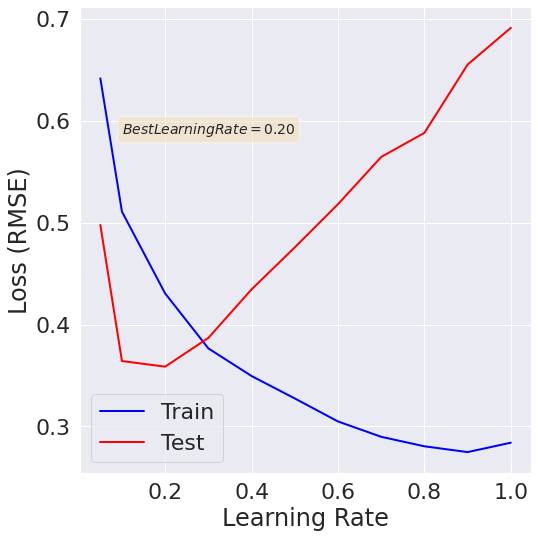

In [126]:
plt.figure(figsize=(8,8))
value=min(rmse_test, key=lambda k: rmse_test[k]) 
plt.plot(list(rmse_train.keys()),list(rmse_train.values()),c='blue',label='Train',linewidth=2)
plt.plot(list(rmse_test.keys()),list(rmse_test.values()),color='red', linewidth=2,label="Test")
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Loss (RMSE)')
plt.tight_layout()
textstr = '$Best Learning Rate=%.2f$' % value
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.1, 0.6, textstr, fontsize=14,
        verticalalignment='top', bbox=props)
plt.show()

In [127]:
n_estimators=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]
rmse_train={}
rmse_test={}
for l in n_estimators:
    gbm = lgb.LGBMRegressor(n_estimators=l,learning_rate=0.2,random_state=0)
    gbm.fit(X_train,Y_train.flatten())
    Y_pred_train=gbm.predict(X_train)
    rmse_train_temp=np.sqrt(mean_squared_error(Y_pred_train,Y_train))
    rmse_train[l]=rmse_train_temp

    Y_pred_test=gbm.predict(X_test)
    rmse_test_temp=np.sqrt(mean_squared_error(Y_pred_test,Y_test))
    rmse_test[l]=rmse_test_temp

In [128]:
rmse_train

{10: 0.9233809243266125,
 20: 0.6994081562527417,
 30: 0.6058936437078042,
 40: 0.5543603533468338,
 50: 0.5237981900220673,
 60: 0.500033668780259,
 70: 0.4830406752687789,
 80: 0.466797559234022,
 90: 0.4500532088374442,
 100: 0.43043534955003687,
 110: 0.4188111197553172,
 120: 0.40569460536806906,
 130: 0.3950224320445545,
 140: 0.38328455600793154,
 150: 0.3718863500035102,
 160: 0.3598880187605104,
 170: 0.3488477727590966,
 180: 0.33959071778753214,
 190: 0.33043112724119733,
 200: 0.3214624555213695,
 210: 0.3112883903631906,
 220: 0.30390585429043754,
 230: 0.2954168774324414,
 240: 0.28695088168414695,
 250: 0.27970600513201965}

In [129]:
rmse_test

{10: 0.8665902079216081,
 20: 0.5802408606490088,
 30: 0.4495890122628233,
 40: 0.39676966781883377,
 50: 0.38790168349290766,
 60: 0.37615890911870214,
 70: 0.37182772990740826,
 80: 0.3668671424894979,
 90: 0.36656636895665246,
 100: 0.3586572280632759,
 110: 0.3573584545393839,
 120: 0.3545193790231072,
 130: 0.35391159984187465,
 140: 0.35354029388680447,
 150: 0.3518923433465807,
 160: 0.3495612944969968,
 170: 0.3479241894025169,
 180: 0.348527911162027,
 190: 0.3463642489185421,
 200: 0.34689291759282376,
 210: 0.34704300074436023,
 220: 0.3473491080375647,
 230: 0.34757625291310495,
 240: 0.3478705673281579,
 250: 0.3490075000733371}

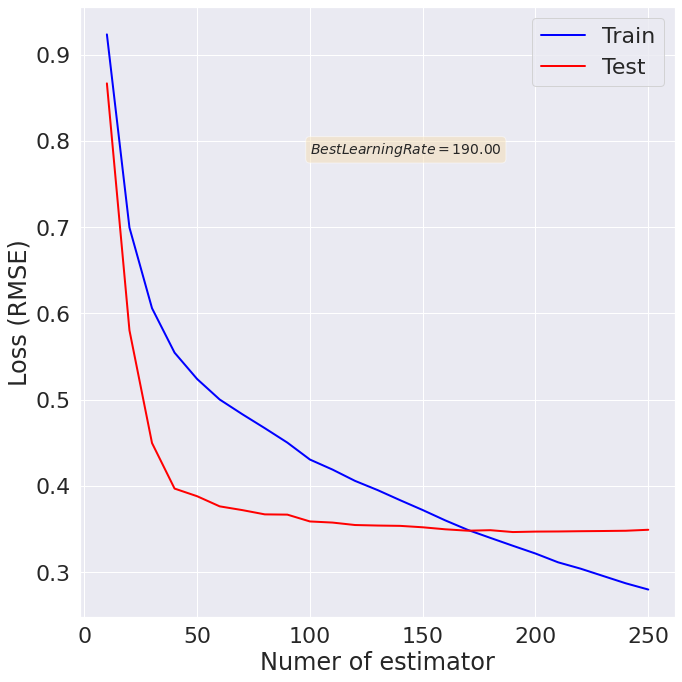

In [130]:
plt.figure(figsize=(10,10))
value=min(rmse_test, key=lambda k: rmse_test[k]) 
plt.plot(list(rmse_train.keys()),list(rmse_train.values()),c='blue',label='Train',linewidth=2)
plt.plot(list(rmse_test.keys()),list(rmse_test.values()),color='red', linewidth=2,label="Test")
plt.legend()
plt.xlabel('Numer of estimator')
plt.ylabel('Loss (RMSE)')
plt.tight_layout()
textstr = '$Best Learning Rate=%.2f$' % value
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(100, 0.8, textstr, fontsize=14,
        verticalalignment='top', bbox=props)
plt.show()

In [131]:
n_sample_train=[100,250,500,1000,2000,5000,9367]
rmse_train={}
rmse_test={}
for l in n_sample_train:
    gbm = lgb.LGBMRegressor(n_estimators=190,learning_rate=0.2,random_state=0)
    gbm.fit(X_train[:l,:],Y_train[:l].flatten())
    Y_pred_train=gbm.predict(X_train)
    rmse_train_temp=np.sqrt(mean_squared_error(Y_pred_train,Y_train))
    rmse_train[l]=rmse_train_temp

    Y_pred_test=gbm.predict(X_test)
    rmse_test_temp=np.sqrt(mean_squared_error(Y_pred_test,Y_test))
    rmse_test[l]=rmse_test_temp

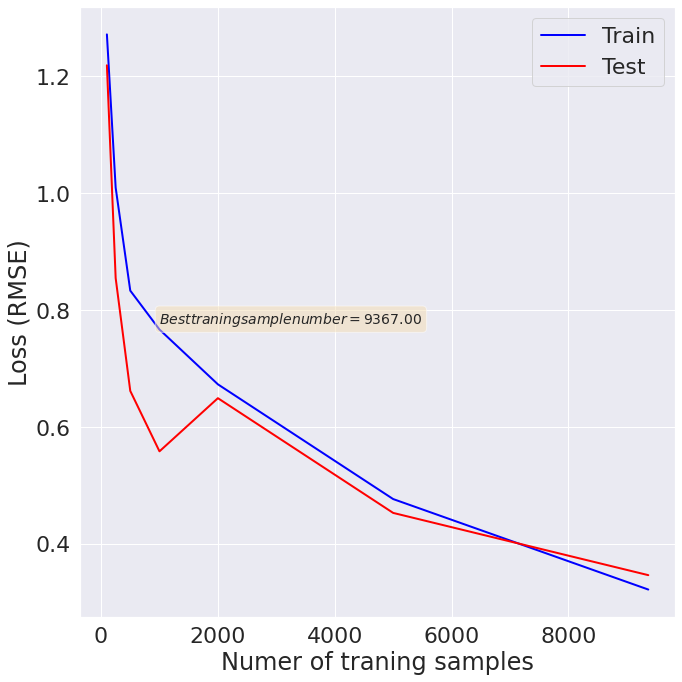

In [132]:
plt.figure(figsize=(10,10))
value=min(rmse_test, key=lambda k: rmse_test[k]) 
plt.plot(list(rmse_train.keys()),list(rmse_train.values()),c='blue',label='Train',linewidth=2)
plt.plot(list(rmse_test.keys()),list(rmse_test.values()),color='red', linewidth=2,label="Test")
plt.legend()
plt.xlabel('Numer of traning samples')
plt.ylabel('Loss (RMSE)')
plt.tight_layout()
textstr = '$Best traning sample number=%.2f$' % value
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(1000, 0.8, textstr, fontsize=14,
        verticalalignment='top', bbox=props)
plt.show()

# Final Model

In [133]:
gbm = lgb.LGBMRegressor(random_state=0,n_estimator=190,learning_rate=0.2)

In [134]:
gbm.fit(X_train, Y_train.flatten())

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimator=190, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [135]:
train_pred=gbm.predict(X_train)
Y_pred=gbm.predict(X_test)
print("R-squared on train data: ",r2_score(Y_train,train_pred))
print("R-squared on test data: ",r2_score(Y_test,Y_pred))

R-squared on train data:  0.9749145200965468
R-squared on test data:  0.9762065811348676


In [136]:
# Metrics
SROCC=spearmanr(Y_test,Y_pred)
KROCC=kendalltau(Y_test,Y_pred)
R_square=r2_score(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [137]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)
print("The Spearman for the data is = ",SROCC)
print("The Kendall correlation for the data is = ",KROCC)

The computed root mean squared error is =  0.3586572280632759
The computed mean absolute error is =  0.27162564937484396
The r2 measure for the model is =  0.9762065811348676
The Spearman for the data is =  SpearmanrResult(correlation=0.9894022942163794, pvalue=0.0)
The Kendall correlation for the data is =  KendalltauResult(correlation=0.9104625597709406, pvalue=0.0)


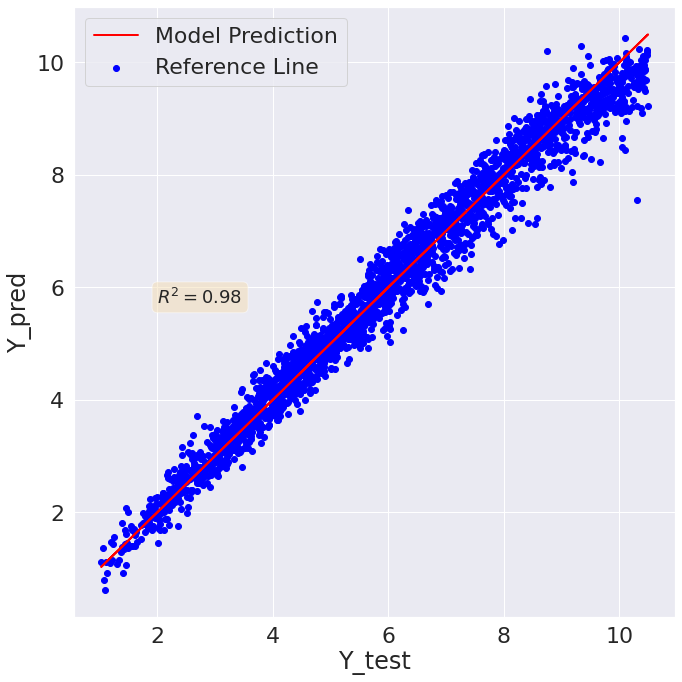

In [138]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red', linewidth=2,label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 6, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()

<Figure size 720x720 with 0 Axes>

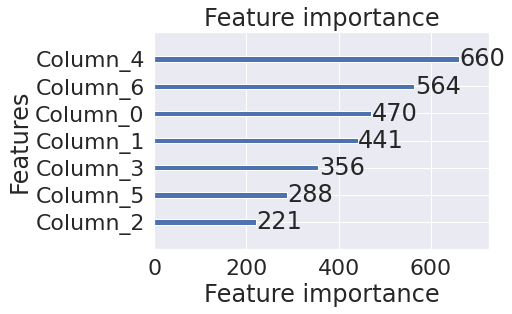

In [139]:
plt.figure(figsize=(10,10))
lgb.plot_importance(gbm)
plt.show()

In [140]:
params = {
        'objective': 'regression',
        'boosting_type': 'gbdt',
        'learning_rate': 0.2,  # 02,
        'n_estimator': 190,
        'seed': 0,
        'verbose': -1,
        'metric': 'neg_mean_absolute_error'
    }

In [141]:
lgb_train = lgb.Dataset(X_train, label=Y_train.flatten(), silent= False, free_raw_data=False)

In [144]:
clf = lgb.train(train_set = lgb_train, params= params, num_boost_round= 8000)

In [155]:
feats=list(train_data.columns)
feats=['nodeline_Y', 'oos', 'oop', 'epskfy', 'epskfc', 'cover', 'time']

In [157]:
feat_importance = pd.DataFrame()
feat_importance ['FEATURE'] = feats
feat_importance['BY_GAIN'] = clf.feature_importance(importance_type='gain').astype('int32')

In [158]:
feat_importance['BY_SPLIT'] = clf.feature_importance(importance_type='split').astype('int32')
feat_importance = feat_importance.sort_values(by=['BY_GAIN', 'BY_SPLIT'], ascending=False)

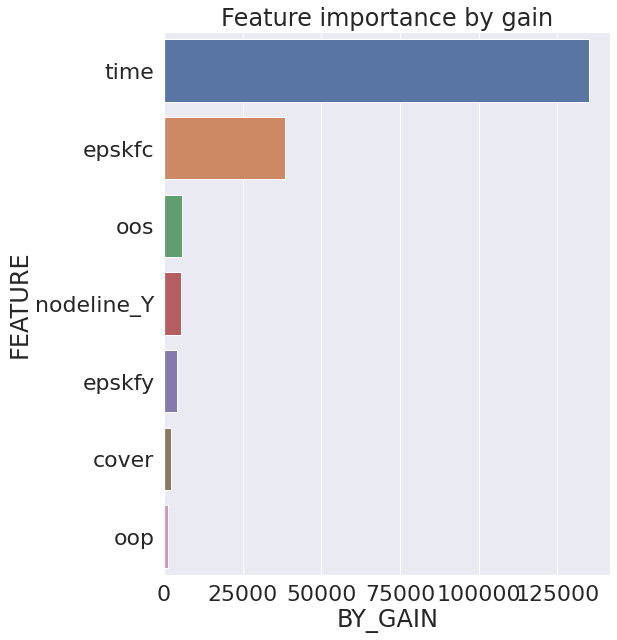

In [159]:
plt.figure(figsize=(8, 10))
sn.barplot(x= 'BY_GAIN', y= 'FEATURE', data= feat_importance)
plt.title('Feature importance by gain')
plt.show()

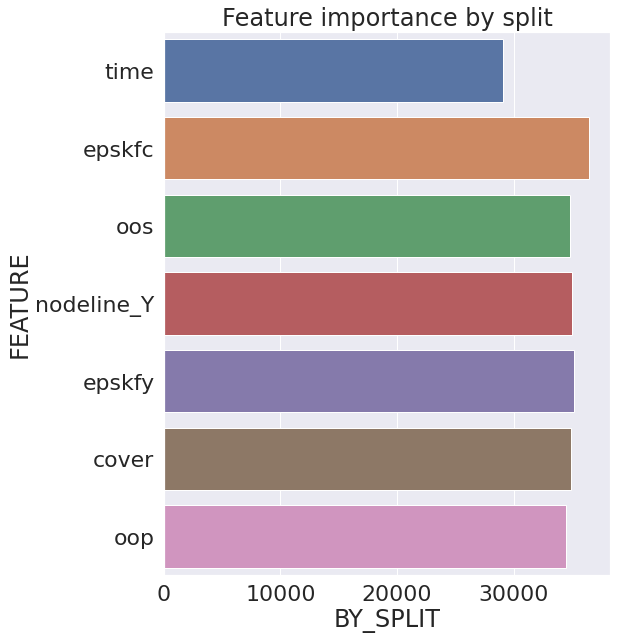

In [160]:
plt.figure(figsize=(8, 10))
sn.barplot(x= 'BY_SPLIT', y= 'FEATURE', data= feat_importance)
plt.title('Feature importance by split')
plt.show()

Shap based analysis

In [161]:
!pip install shap

     |████████████████████████████████| 358kB 8.2MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491614 sha256=208d78fe9b12acb2d8bfbd50c96945e2a1dc302d95238ef499b1d0f950eff841
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [162]:
import shap

In [163]:
train=pd.DataFrame(X_train,columns=feats)
train_df=pd.concat([train, train_output], axis=1)

In [164]:
total_columns=list(train_df.columns)

In [165]:
total_columns

['nodeline_Y', 'oos', 'oop', 'epskfy', 'epskfc', 'cover', 'time', 'Load']

In [166]:
shap_values = shap.TreeExplainer(clf).shap_values(X_train)

In [167]:
shap_df = pd.DataFrame(shap_values, columns = feats)

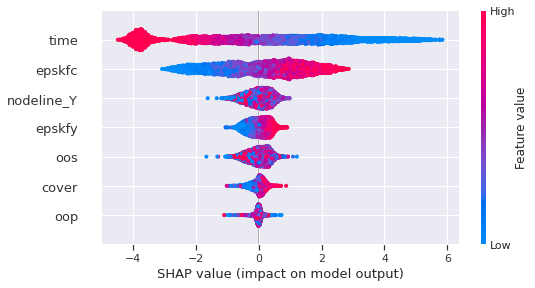

In [168]:
shap.initjs()
shap.summary_plot(shap_df.values, train)

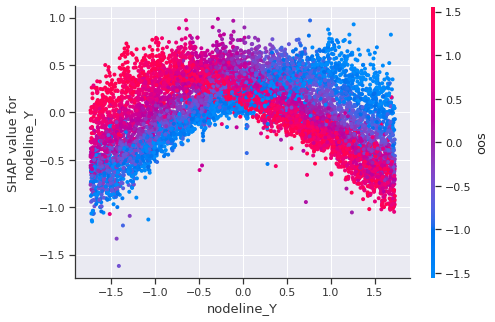

In [169]:
shap.dependence_plot('nodeline_Y', shap_df.values, train)

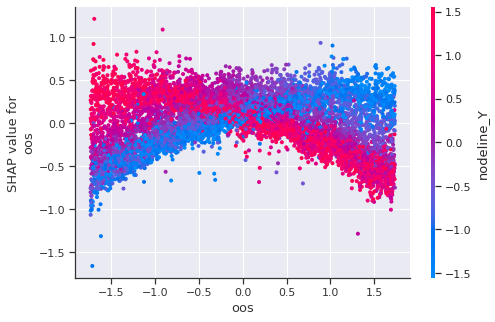

In [170]:
shap.dependence_plot('oos', shap_df.values, train)

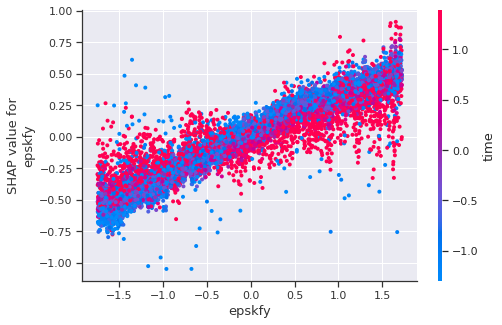

In [171]:
shap.dependence_plot('epskfy', shap_df.values, train)

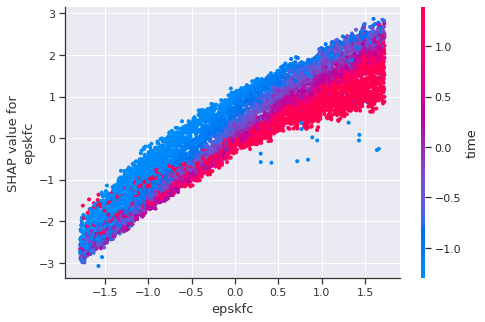

In [172]:
shap.dependence_plot('epskfc', shap_df.values, train)

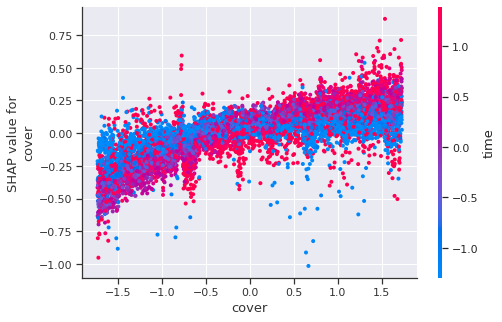

In [173]:
shap.dependence_plot('cover', shap_df.values, train)

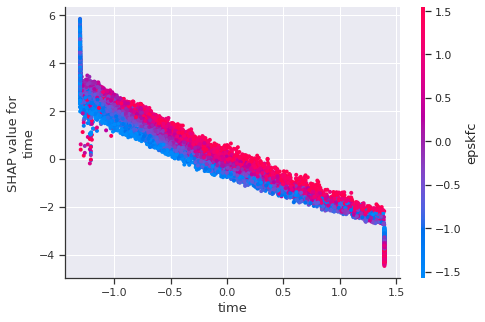

In [175]:
shap.dependence_plot('time', shap_df.values, train)